# 📊 Sales Demand Forecasting Model
This project develops a regression-based machine learning model to analyze historical sales data and forecast future demand.  
It uses **Python, pandas, scikit-learn, and matplotlib** for data analysis, preprocessing, model training, and visualization.
    

In [5]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [7]:
import pandas as pd
import numpy as np

# Generate sample sales data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=180, freq="D")
sales = np.random.randint(50, 200, size=len(dates)) + np.linspace(0, 50, len(dates))

data = pd.DataFrame({"Date": dates, "Sales": sales})
data.head()


,Date,Sales
0,2023-01-01,152.000000
1,2023-01-02,142.279330
2,2023-01-03,64.558659
3,2023-01-04,156.837989
4,2023-01-05,122.117318


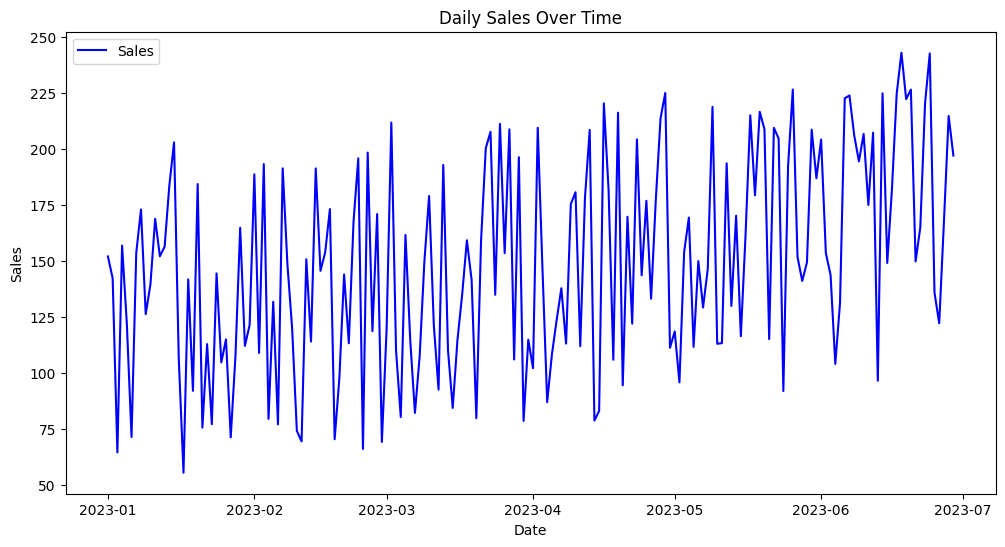

In [8]:
# Visualize sales trend
plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Sales"], label="Sales", color="blue")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


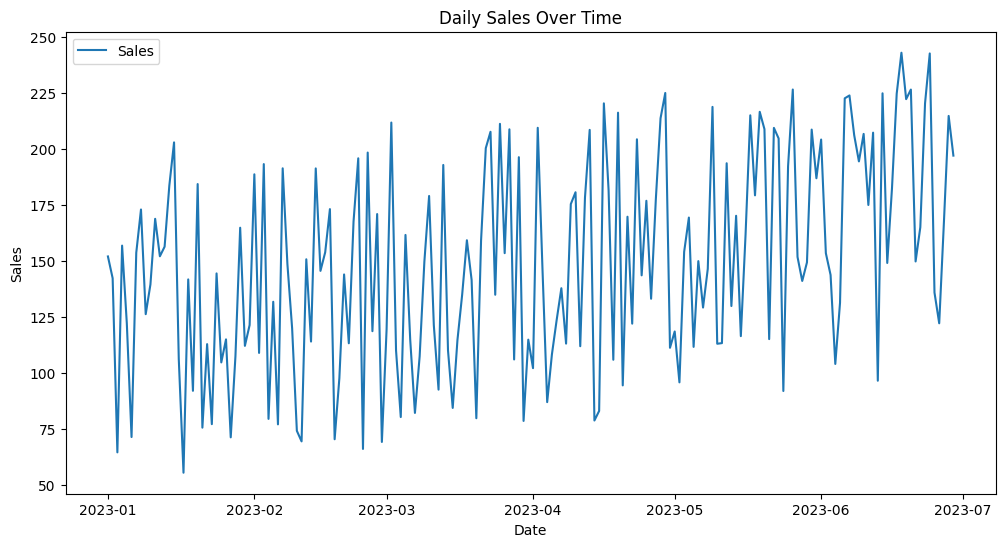

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Sales"], label="Sales")
plt.title("Daily Sales Over Time")
plt.xlabel("Date"); plt.ylabel("Sales")
plt.legend(); plt.show()


In [10]:
df = data.copy()
df["day"] = df["Date"].dt.day
df["month"] = df["Date"].dt.month
df["dow"] = df["Date"].dt.dayofweek  # 0=Mon

X = df[["day","month","dow"]]
y = df["Sales"]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE:  38.10
RMSE: 43.62


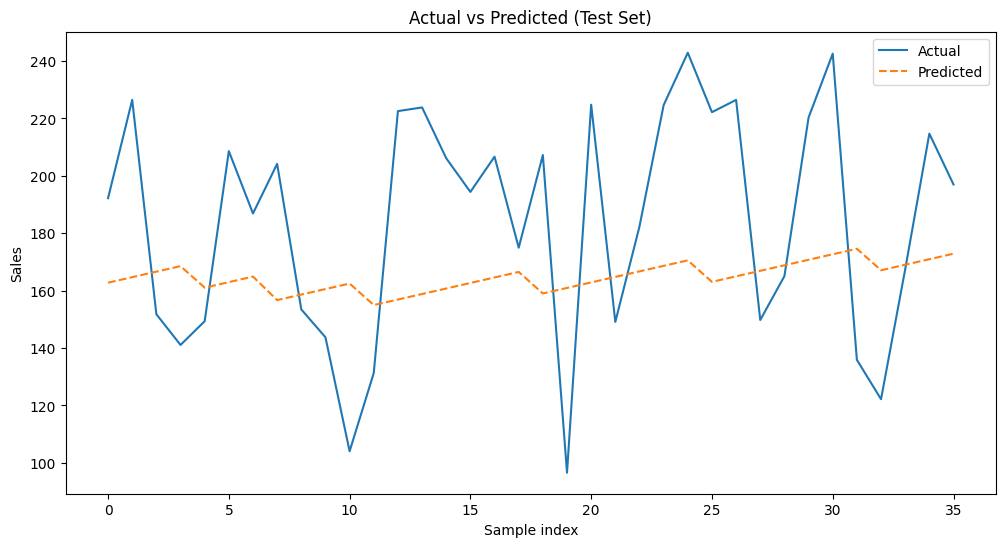

In [14]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.title("Actual vs Predicted (Test Set)")
plt.xlabel("Sample index"); plt.ylabel("Sales")
plt.legend(); plt.show()


In [15]:
# build future feature matrix
future_dates = pd.date_range(df["Date"].max() + pd.Timedelta(days=1), periods=30, freq="D")
future = pd.DataFrame({"Date": future_dates})
future["day"] = future["Date"].dt.day
future["month"] = future["Date"].dt.month
future["dow"] = future["Date"].dt.dayofweek

future["Sales_Pred"] = model.predict(future[["day","month","dow"]])
future.head()


,Date,day,month,dow,Sales_Pred
0,2023-06-30,30,6,4,174.799284
1,2023-07-01,1,7,5,167.191080
2,2023-07-02,2,7,6,169.114954
3,2023-07-03,3,7,0,161.614887
4,2023-07-04,4,7,1,163.538761


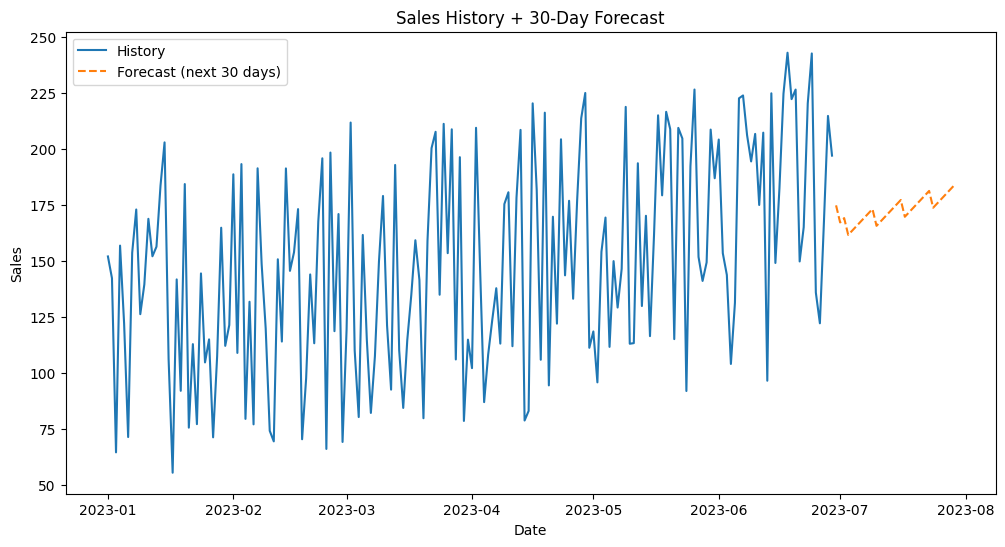

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Sales"], label="History")
plt.plot(future["Date"], future["Sales_Pred"], label="Forecast (next 30 days)", linestyle="--")
plt.title("Sales History + 30-Day Forecast")
plt.xlabel("Date"); plt.ylabel("Sales")
plt.legend(); plt.show()


In [17]:
import os
os.makedirs("data", exist_ok=True)
data.to_csv("data/sales_data.csv", index=False)
